In [2]:
import cfgrib
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

from baselines.data_processor import DataProcessor
from baselines.lgb.lgb_regressor import LightGBMRegressor

/home/kamil/Desktop/git/meteoapp-data/venv/lib/python3.11/site-packages/gribapi/__init__.py:23: UserWarning: ecCodes 2.31.0 or higher is recommended. You are running version 2.30.0
  warnings.warn(


In [3]:
grib_data = cfgrib.open_datasets('../data2022.grib')
surface = grib_data[0] 
hybrid = grib_data[1] 

In [4]:
feature_list = ['t2m', 'sp', 'tcc', 'u10', 'v10', 'tp']
t2m = surface.t2m.to_numpy() - 273.15  # -> C
sp = surface.sp.to_numpy() / 100       # -> hPa
tcc = surface.tcc.to_numpy()
u10 = surface.u10.to_numpy()
v10 = surface.v10.to_numpy()
tp = hybrid.tp.to_numpy().reshape((-1,) + hybrid.tp.shape[2:])
data = np.stack((t2m, sp, tcc, u10, v10, tp), axis=-1)

In [5]:
s = 3
fh = 1

processor = DataProcessor(data)
X, y = processor.preprocess(s, fh, use_neighbours=False)
X_train, X_test, y_train, y_test = processor.train_test_split(X, y)

In [ ]:
from time import time 
start = time()

regressor = LightGBMRegressor(X.shape, fh, feature_list)
regressor.train(X_train, y_train)
_ = regressor.predict_and_evaluate(X_test, y_test, max_samples=1)
print()
    
stop = time()
print('\n', stop-start, '[S]')

t2m => RMSE:  1.44391; SE: 0.03804538822322544
sp => RMSE:  1.48408; SE: 0.5929344035917864
tcc => RMSE:  0.24842; SE: 0.006463310819156775
u10 => RMSE:  1.46408; SE: 0.053224365545897906
v10 => RMSE:  2.03826; SE: 0.0433727751208579
tp => RMSE:  0.00024; SE: 7.197806686884264e-06


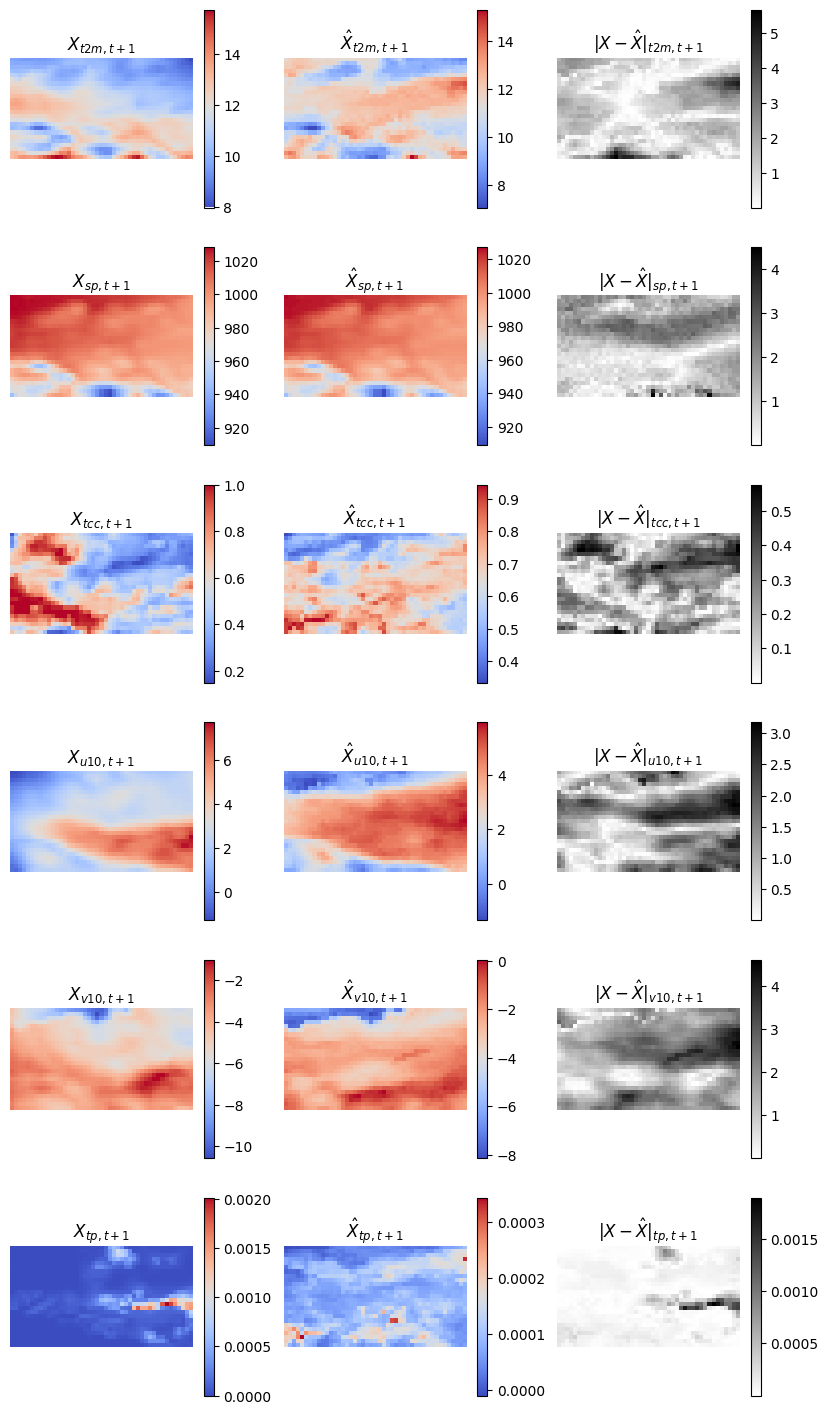

Evaluation metrics for entire test set:
t2m => RMSE: 2.258; SE: 0.010200797752953046
sp => RMSE: 1.6; SE: 0.03702956939722691
tcc => RMSE: 0.249; SE: 0.0004828579478474195
u10 => RMSE: 1.392; SE: 0.005026088934293758
v10 => RMSE: 1.209; SE: 0.004110117665590181
tp => RMSE: 0.0; SE: 3.4696299529253065e-07


In [8]:
_ = regressor.predict_and_evaluate(X_test, y_test, max_samples=1)